In [0]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target labels (0: Setosa, 1: Versicolour, 2: Virginica)

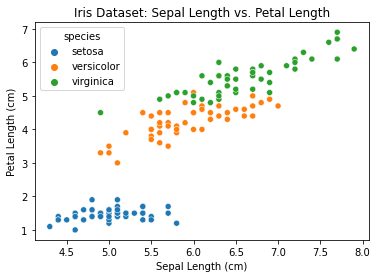

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Scatter plot of Sepal Length vs. Petal Length
sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=iris)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Iris Dataset: Sepal Length vs. Petal Length")
plt.show()

In [0]:
from pyspark.ml.clustering import PowerIterationClustering
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("PICClustering").getOrCreate()

# Convert the scikit-learn data to a DataFrame
data = [(i, j, 1.0) for i in range(len(X)) for j in range(len(X)) if i != j]
df = spark.createDataFrame(data, ["src", "dst", "weight"])

# Create a PowerIterationClustering model
pic = PowerIterationClustering(k=3, weightCol="weight")

# Run the PIC algorithm and get cluster assignments
assignments = pic.assignClusters(df)

# Show the cluster assignments
assignments.show()


+---+-------+
| id|cluster|
+---+-------+
| 96|      0|
| 56|      2|
|112|      2|
|120|      2|
| 16|      0|
| 80|      1|
| 48|      1|
|128|      2|
|104|      1|
| 32|      0|
| 24|      1|
| 64|      0|
|  0|      2|
| 40|      1|
| 72|      2|
|  8|      2|
|136|      0|
| 88|      1|
|144|      2|
| 41|      0|
+---+-------+
only showing top 20 rows



In [0]:
import matplotlib.pyplot as plt

# Assuming you have a 2D representation of the data (e.g., using PCA or t-SNE)
# Replace the following with your actual 2D data
# 2D_data = ...

# Collect the values from the DataFrame
cluster_ids = assignments.select("id").rdd.flatMap(lambda x: x).collect()

plt.scatter([point[0] for point in 2D_data], [point[1] for point in 2D_data], c=cluster_ids, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from PIC')
plt.show()

  File <command-2908121104079612>:10
    plt.scatter([point[0] for point in 2D_data], [point[1] for point in 2D_data], c=cluster_ids, cmap='viridis')
                                        ^
SyntaxError: invalid syntax


In [0]:
from sklearn.datasets import load_iris
from pyspark.sql import SparkSession
from pyspark.ml.clustering import PowerIterationClustering
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("PICClustering").getOrCreate()

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Convert features to dense vectors
data = [(Vectors.dense(X[i]),) for i in range(len(X))]
data_df = spark.createDataFrame(data, ["features"])

# Create a PowerIterationClustering model
pic = PowerIterationClustering(k=3)  # Remove the 'featuresCol' parameter

# Fit the model to the data
#model = pic.fit(data_df)

# Make predictions
assignments = pic.assignClusters(data_df)

# Evaluate the clustering using silhouette score
evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(assignments)
print(f"Silhouette Score: {silhouette_score}")

# Plot the clusters (assuming 2D data)
transformed_pd = assignments.toPandas()
plt.scatter(transformed_pd["features"].apply(lambda x: x[0]), transformed_pd["features"].apply(lambda x: x[1]), c=transformed_pd["prediction"], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters from PIC')
plt.show()

---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-2908121104079613>:26
     20 pic = PowerIterationClustering(k=3)  # Remove the 'featuresCol' parameter
     22 # Fit the model to the data
     23 #model = pic.fit(data_df)
     24 
     25 # Make predictions
---> 26 assignments = pic.assignClusters(data_df)
     28 # Evaluate the clustering using silhouette score
     29 evaluator = ClusteringEvaluator()

File /databricks/spark/python/pyspark/ml/clustering.py:2117, in PowerIterationClustering.assignClusters(self, dataset)
   2114 self._transfer_params_to_java()
   2115 assert self._java_obj is not None
-> 2117 jdf = self._java_obj.assignClusters(dataset._jdf)
   2118 return DataFrame(jdf, dataset.sparkSession)

File /databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py:1321, in JavaMember.__call__(self, *args)
   1315 command = proto.CALL_COMMAND_NAME +\

In [0]:
data_df.show()

+-----------------+
|         features|
+-----------------+
|[5.1,3.5,1.4,0.2]|
|[4.9,3.0,1.4,0.2]|
|[4.7,3.2,1.3,0.2]|
|[4.6,3.1,1.5,0.2]|
|[5.0,3.6,1.4,0.2]|
|[5.4,3.9,1.7,0.4]|
|[4.6,3.4,1.4,0.3]|
|[5.0,3.4,1.5,0.2]|
|[4.4,2.9,1.4,0.2]|
|[4.9,3.1,1.5,0.1]|
|[5.4,3.7,1.5,0.2]|
|[4.8,3.4,1.6,0.2]|
|[4.8,3.0,1.4,0.1]|
|[4.3,3.0,1.1,0.1]|
|[5.8,4.0,1.2,0.2]|
|[5.7,4.4,1.5,0.4]|
|[5.4,3.9,1.3,0.4]|
|[5.1,3.5,1.4,0.3]|
|[5.7,3.8,1.7,0.3]|
|[5.1,3.8,1.5,0.3]|
+-----------------+
only showing top 20 rows

